In [1]:
!pip install pandas

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Artifacts/reddit comments.csv')

In [4]:
data.head()

,comment_id,self_text,label
0,k70vrzb,Lol what kind of busted translator device you ...,0.0
1,k70vk4r,Translation:\n\nAmen. Kill jews and continue g...,0.0
2,k70vhew,Friendly fact reminder: Israel has been steali...,0.0
3,k70ve4h,"Well, i would never support Hamas, but there a...",0.0
4,k70vaxh,There is absolutely evidence of Hamas taking C...,1.0


## Data preproccesing

In [5]:
data.shape

(10001, 3)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

comment_id    0
self_text     0
label         2
dtype: int64

### Text Preprocess 

In [8]:
import re
import string

#### Convert uppercase into lowercase

In [9]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation: amen. kill jews and continue gaza...
2    friendly fact reminder: israel has been steali...
3    well, i would never support hamas, but there a...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

#### Remove links

In [11]:
data["self_text"] = data['self_text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

#### Remove punctuation 

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["self_text"] = data["self_text"].apply(remove_punctuations)

In [14]:
data["self_text"].head(10)

0    lol what kind of busted translator device you ...
1    translation amen kill jews and continue gazan ...
2    friendly fact reminder israel has been stealin...
3    well i would never support hamas but there act...
4    there is absolutely evidence of hamas taking c...
5    do you have the avtual link to the new york ti...
6    i didnt deny anything you said i said israel d...
7    gtyes exactly hamas attacked not the 1 million...
8    firstly even in the best scenario you are conf...
9    oh i guess since hamas is putting the children...
Name: self_text, dtype: object

#### Remove numbers

In [15]:
data["self_text"] = data['self_text'].str.replace(r'\d+', '', regex=True)

#### Remove stop words

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk

In [18]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [20]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [22]:
data["self_text"].head()

0    lol kind busted translator device got speak ha...
1    translation amen kill jews continue gazan oppr...
2    friendly fact reminder israel stealing palesti...
3    well would never support hamas actions israel ...
4    absolutely evidence hamas taking captagon drug...
Name: self_text, dtype: object

## Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [25]:
data["self_text"].head()

0       lol kind bust translat devic got speak hasbara
1         translat amen kill jew continu gazan oppress
2    friendli fact remind israel steal palestin lan...
3    well would never support hama action israel co...
4    absolut evid hama take captagon drug similar p...
Name: self_text, dtype: object

## Build Vocabulary

In [26]:
from collections import Counter
vocab = Counter()

In [27]:
vocab

Counter()

In [28]:
for sentence in data['self_text']:
    vocab.update(sentence.split())

In [29]:
len(vocab)

13638

In [30]:
data.shape

(10001, 3)

In [31]:
vocab

Counter({'israel': 3947,
         'hama': 2877,
         'peopl': 2519,
         'palestinian': 2127,
         'like': 1568,
         'isra': 1440,
         'jew': 1433,
         'gaza': 1406,
         'would': 1269,
         'war': 1163,
         'think': 1137,
         'one': 1133,
         'kill': 1099,
         'dont': 1054,
         'even': 1024,
         'civilian': 1014,
         'want': 996,
         'say': 994,
         'right': 968,
         'go': 964,
         'arab': 922,
         'get': 920,
         'know': 907,
         'countri': 848,
         'support': 841,
         'also': 823,
         'make': 801,
         'live': 765,
         'state': 759,
         'us': 759,
         'use': 730,
         'world': 724,
         'palestin': 712,
         'bomb': 696,
         'mani': 648,
         'see': 645,
         'year': 643,
         'time': 626,
         'attack': 623,
         'it’': 621,
         'land': 616,
         'take': 611,
         'peac': 609,
         'happen': 

In [32]:
tokens = [key for key in vocab if vocab[key] > 10]

In [33]:
len(tokens)

2337

In [34]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [35]:
data

,comment_id,self_text,label
0,k70vrzb,lol kind bust translat devic got speak hasbara,0.0
1,k70vk4r,translat amen kill jew continu gazan oppress,0.0
2,k70vhew,friendli fact remind israel steal palestin lan...,0.0
3,k70ve4h,well would never support hama action israel co...,0.0
4,k70vaxh,absolut evid hama take captagon drug similar p...,1.0
...,...,...,...
9996,k6xxvbz,gtthe peopl ive fight equal right issu sinc pe...,1.0
9997,k6xxv7i,think someon right kick home live mani year,1.0
9998,k6xxunr,nobodi think egypt syria either,1.0
9999,k6xxtox,build arena sole purpos violent protest keep c...,1.0


## Divide dataset

In [36]:
x= data['self_text']
y= data['label']

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
x_train.shape

(8000,)

In [40]:
x_test.shape

(2001,)

In [41]:
x_train

145                              bu phuuull sapport saaar
5413    monkey leader let us pass border israel would ...
8055    think frame like isnt go chang choic keep allo...
7152    reason simpl terrifyingli simpl war actual war...
7794    mani german civilian die ww govern start war c...
                              ...                        
9323                                                     
1212    someth intellig get wrong cut clear anymor tal...
4675    un decis took away half land fight keep unfair...
537     didn’t america form expens peopl didn’t austra...
8360    i’m asian live canadian asiancanadian nonmidea...
Name: self_text, Length: 8000, dtype: object

In [42]:
y_test

2171    1.0
3337    1.0
5446    1.0
7090    1.0
8851    1.0
       ... 
5657    1.0
389     1.0
8139    1.0
2072    1.0
7446    1.0
Name: label, Length: 2001, dtype: float64

## Vectorization

In [43]:
def vectorizer (ds,vocabulary):
    vectorized_lst =[]

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary [i] in sentence.split():
               sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype = np.float32)

    return vectorized_lst_new

In [44]:
vectorized_x_train = vectorizer(x_train,tokens)

In [45]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(8000, 2337), dtype=float32)

In [46]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [47]:
vectorized_x_test = vectorizer(x_test,tokens)

In [48]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2001, 2337), dtype=float32)

In [49]:
y_train

145     1.0
5413    1.0
8055    0.0
7152    0.0
7794    1.0
       ... 
9323    1.0
1212    1.0
4675    1.0
537     0.0
8360    1.0
Name: label, Length: 8000, dtype: float64

In [50]:
y_test

2171    1.0
3337    1.0
5446    1.0
7090    1.0
8851    1.0
       ... 
5657    1.0
389     1.0
8139    1.0
2072    1.0
7446    1.0
Name: label, Length: 2001, dtype: float64

In [51]:
y_train.value_counts()

label
1.0    7063
0.0     935
Name: count, dtype: int64

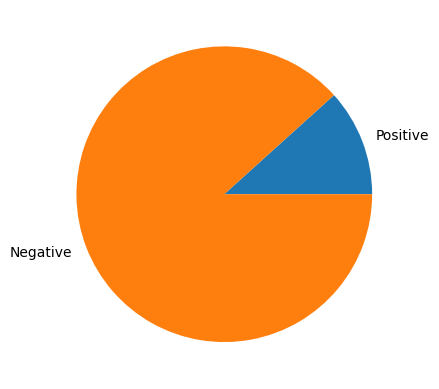

In [52]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]) ,labels = ['Positive','Negative'])
plt.show()

### Handle Imbalanced Dataset

In [53]:
!pip install imbalanced_learn

In [54]:
print(vectorized_x_train.shape)  # Should be (8000, number_of_features)
print(y_train.shape)              # Should be (8000,)

(8000, 2337)
(8000,)


In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(14126, 2337) (14126,)


In [62]:
y_train_smote.value_counts()

label
1.0    7063
0.0    7063
Name: count, dtype: int64

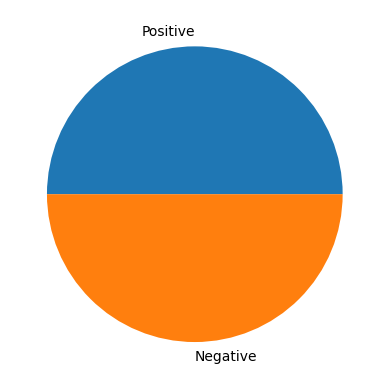

In [63]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]) ,labels = ['Positive','Negative'])
plt.show()

In [64]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(14126, 2337), dtype=float32)

In [65]:
y_train_smote

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
14121    0.0
14122    0.0
14123    0.0
14124    0.0
14125    0.0
Name: label, Length: 14126, dtype: float64

In [66]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2001, 2337), dtype=float32)

In [67]:
y_test

2171    1.0
3337    1.0
5446    1.0
7090    1.0
8851    1.0
       ... 
5657    1.0
389     1.0
8139    1.0
2072    1.0
7446    1.0
Name: label, Length: 2001, dtype: float64